In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [4]:
start=0
end=1
step=0.02

weights=0.7
bias=0.3

In [5]:
X=torch.arange(start,end,step).unsqueeze(dim=1)
train_split=int(0.8*len(X))
y=weights * X +bias

In [6]:
#train test data split
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
X_test.shape , y_test.shape

(torch.Size([10, 1]), torch.Size([10, 1]))

In [7]:
X_train.shape

torch.Size([40, 1])

In [8]:
import torch
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.tensor):
        return self.weights * x + self.bias



In [9]:
torch.manual_seed(42)
model=LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
#make prediction through torch.inference_mode()
with torch.inference_mode():
    y_pred=model(X_test)

In [12]:
print(y_pred , y_test)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]]) tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


In [13]:
def plot_prediction(train_data=X_train,
                    train_label=y_train,
                    test_data=X_test,
                    test_label=y_test,
                    prediction=None):

      plt.figure(figsize=(5,6))
      plt.scatter(train_data,train_label,c='b',s=4,label='Train_data')
      plt.scatter(test_data,test_label,c='g',s=3,label='test_label')

      if prediction is not None:
        plt.scatter(test_data,prediction,c='r',s=6,label='prediction')

      plt.legend({'size':14})


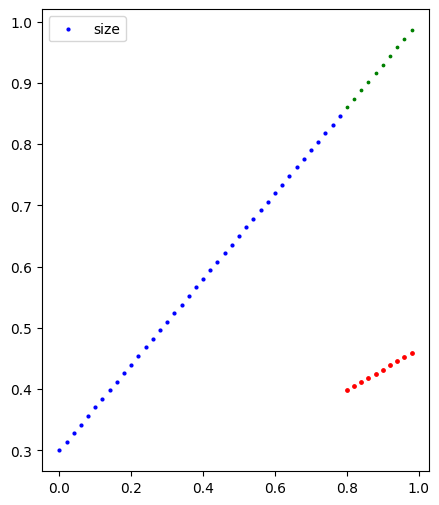

In [14]:
plot_prediction(prediction=y_pred)

In [15]:
## loss funcrtion and optmizer setup
loss_fn = torch.nn.L1Loss(reduction='mean')

optimizer=torch.optim.SGD(model.parameters(),lr=0.001)

In [16]:
epochs=1000
torch.manual_seed(42)

for epoch in range(epochs):
  model.train()
  y_pred=model(X_train)
  loss=loss_fn(y_pred,y_train)
  print(loss)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  print(model.state_dict)


tensor(0.3129, grad_fn=<MeanBackward0>)
<bound method Module.state_dict of LinearRegressionModel()>
tensor(0.3117, grad_fn=<MeanBackward0>)
<bound method Module.state_dict of LinearRegressionModel()>
tensor(0.3106, grad_fn=<MeanBackward0>)
<bound method Module.state_dict of LinearRegressionModel()>
tensor(0.3094, grad_fn=<MeanBackward0>)
<bound method Module.state_dict of LinearRegressionModel()>
tensor(0.3083, grad_fn=<MeanBackward0>)
<bound method Module.state_dict of LinearRegressionModel()>
tensor(0.3071, grad_fn=<MeanBackward0>)
<bound method Module.state_dict of LinearRegressionModel()>
tensor(0.3060, grad_fn=<MeanBackward0>)
<bound method Module.state_dict of LinearRegressionModel()>
tensor(0.3048, grad_fn=<MeanBackward0>)
<bound method Module.state_dict of LinearRegressionModel()>
tensor(0.3037, grad_fn=<MeanBackward0>)
<bound method Module.state_dict of LinearRegressionModel()>
tensor(0.3025, grad_fn=<MeanBackward0>)
<bound method Module.state_dict of LinearRegressionModel()>


In [17]:
model.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

In [18]:
model.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

In [19]:
with torch.inference_mode():
  y_pred_new=model(X_test)

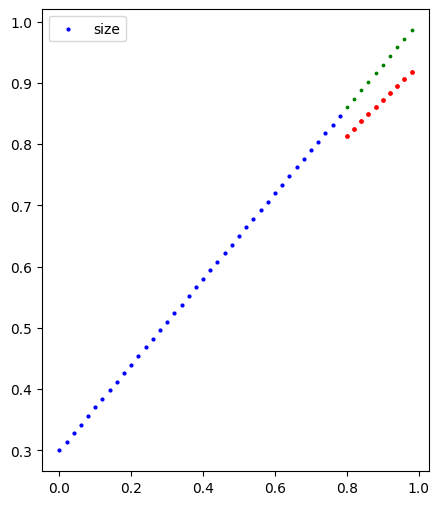

In [20]:
plot_prediction(prediction=y_pred_new)

In [26]:
class linear1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,out_features=1)

  def forward(self,x: torch.tensor):
    return self.linear_layer(x)


torch.manual_seed(42)
model_new=linear1()
model_new.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [22]:
list(model_new.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [27]:
loss_fn=torch.nn.L1Loss()
optimizer=torch.optim.Adam(model_new.parameters(),lr=0.01)

In [28]:
torch.manual_seed(42)

epochs=200

for epoch in range(epochs):

  #model train start
  model_new.train()

  y_pred=model_new(X_train)

  #calculate training loss
  loss=loss_fn(y_pred,y_train)

  #Optimizer
  optimizer.zero_grad()

  #back propagation
  loss.backward()

  #optimizer step
  optimizer.step()

  #Testing
  model_new.eval()

  with torch.inference_mode():
    y_new_pred=model_new(X_test)
    test_loss=loss_fn(y_new_pred,y_test)

  if epoch %10==0:


    print(f'Epochs : {epoch} | Train Loss :{loss} | Test loss : {test_loss}')

Epochs : 0 | Train Loss :0.5551779866218567 | Test loss : 0.568547248840332
Epochs : 10 | Train Loss :0.4161780774593353 | Test loss : 0.3795473873615265
Epochs : 20 | Train Loss :0.27717819809913635 | Test loss : 0.19054758548736572
Epochs : 30 | Train Loss :0.13817831873893738 | Test loss : 0.012273055501282215
Epochs : 40 | Train Loss :0.06483234465122223 | Test loss : 0.15948258340358734
Epochs : 50 | Train Loss :0.06953977048397064 | Test loss : 0.19462478160858154
Epochs : 60 | Train Loss :0.055640317499637604 | Test loss : 0.14198970794677734
Epochs : 70 | Train Loss :0.0445832796394825 | Test loss : 0.08211381733417511
Epochs : 80 | Train Loss :0.035734184086322784 | Test loss : 0.0650385171175003
Epochs : 90 | Train Loss :0.02559966780245304 | Test loss : 0.05930420756340027
Epochs : 100 | Train Loss :0.015041230246424675 | Test loss : 0.029013926163315773
Epochs : 110 | Train Loss :0.004283731337636709 | Test loss : 0.008546513505280018
Epochs : 120 | Train Loss :0.0037691318

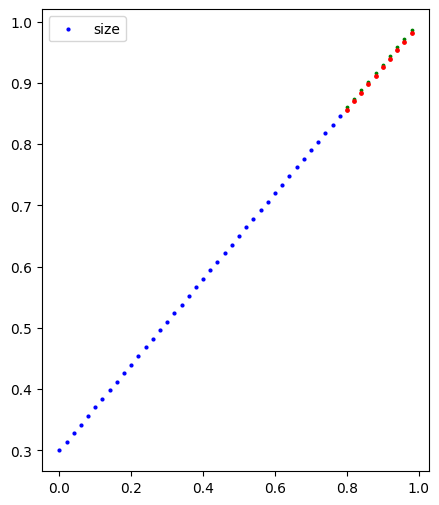

In [29]:
plot_prediction(prediction=y_new_pred)